![Alt text](image-1.png)
 ![Alt text](image.png)

 Kamila:202214959
 
 Cristian 202113643

In [1]:
import pandas as pd

puerto_e1={'nombre_puerto':'Alto de patios-Bogota',
            'Distancia[km]':5.91,
            'Elevación máxima [msnm]':3022,
            'Elevación mínima [msnm]':2612,
            'Elevación ganada [msnm]':410,
            'Pendiente promedio[%]':6.9,
            'Mejor tiempo Strava [min]':14.733}
puerto_e2={'nombre_puerto':'Alto de patios-Teusacá',
            'Distancia[km]':2.98,
            'Elevación máxima [msnm]':3019,
            'Elevación mínima [msnm]':2818,
            'Elevación ganada [msnm]':233,
            'Pendiente promedio[%]':6.7,
            'Mejor tiempo Strava [min]':6.400}
df=[puerto_e1,puerto_e2]
df=pd.DataFrame(df)

df

,nombre_puerto,Distancia[km],Elevación máxima [msnm],Elevación mínima [msnm],Elevación ganada [msnm],Pendiente promedio[%],Mejor tiempo Strava [min]
0,Alto de patios-Bogota,5.91,3022,2612,410,6.9,14.733
1,Alto de patios-Teusacá,2.98,3019,2818,233,6.7,6.400


![Alt text](image-2.png)



In [2]:
Vgs = #ground speed
Cd_A= 0.35 #coeficiente de arrastre
w = 83.50 # kg
Vhw = 0
Crr = 0.005 
loss_dt= 2 #[%] 
p = 0 #de acuerdo a criterio ingenieril
C= (g*W*sin(alpha))+(g*w*cos(alpha)*Crr)
Potencia=Vgs()

SyntaxError: invalid syntax (2990450665.py, line 1)

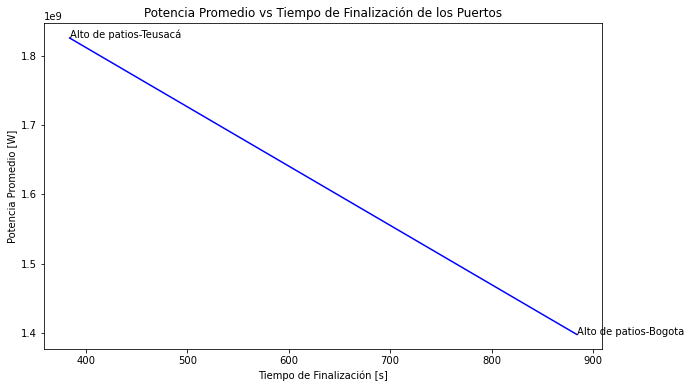

In [12]:
#Intento 1
import matplotlib.pyplot as plt

# Valores iniciales
CdA = 0.35
W = 83.50  # kg
V_hwww = 0  # m/s
Cg = 0.005
L_rrrr = 2  # %
rho = 1.225  # kg/m^3
g=9.81

# Calcular la potencia promedio requerida
df['Mejor tiempo Strava [s]'] = df['Mejor tiempo Strava [min]'] * 60
df['Potencia Promedio [W]'] = ((1 - L_rrrr / 100) ** -1) * (g * W * (df['Elevación ganada [msnm]'] / df['Distancia[km]']) +
        0.5 * CdA * rho * (df['Distancia[km]'] * 1000) * (df['Mejor tiempo Strava [s]'] / 3600 + V_hwww) ** 2
    ) * (df['Distancia[km]'] * 1000) / (df['Mejor tiempo Strava [s]'] / 3600)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df['Mejor tiempo Strava [s]'], df['Potencia Promedio [W]'], color='blue')
plt.title('Potencia Promedio vs Tiempo de Finalización de los Puertos')
plt.xlabel('Tiempo de Finalización [s]')
plt.ylabel('Potencia Promedio [W]')

# Añadir etiquetas de los puertos
for i, txt in enumerate(df['nombre_puerto']):
    plt.annotate(txt, (df['Mejor tiempo Strava [s]'][i], df['Potencia Promedio [W]'][i]))

plt.show()


In [7]:
"""
#potencia promedio del ciclista (237 W),utilizamos la ecuación de potencia para calcular el tiempo de finalización:

Potencia Promedio = (Trabajo_Total)/(Tiempo_Total):

Tiempo_total= (Trabajo_total)/(Potencia_promedio) 
            = (Distancia)/(Potencia_promedio)
            = (Distancia)/237
 
Vamos a calcular el tiempo de finalización para cada puerto:
"""
# Calcular tiempo de finalización para cada puerto
df['Tiempo Total [s]'] = (df['Distancia[km]'] * 1000) / 237

df[['nombre_puerto', 'Tiempo Total [s]']]


,nombre_puerto,Tiempo Total [s]
0,Alto de patios-Bogota,24.936709
1,Alto de patios-Teusacá,12.573840


In [13]:
# Intento 2
import math

# Variables
weight = 70 # kg
pendiente = 5 # %
densidad = 1.2 # kg/m^3
area = 0.5 # m^2
coeficiente_resistencia_rodadura = 0.005
coeficiente_arrastre = 0.7
velocidad_viento = 0 # m/s

# Fuerzas
gravedad = 9.81 * weight * math.sin(math.atan(pendiente/100))
fuerza_resistencia_rodadura = 9.81 * weight * math.cos(math.atan(pendiente/100)) * coeficiente_resistencia_rodadura
fuerza_arrastre = 0.5 * coeficiente_arrastre * area * densidad * (velocidad_viento**2) / (1.0**2)

total_force = gravedad + fuerza_resistencia_rodadura + fuerza_arrastre

# Calculo potencia requerida
ground_speed = 10 # m/s
power_required = total_force * ground_speed

# Calculo eficiencia
powertrain_efficiency = 0.95

# Calculo potencia en los pedales
power_at_pedals = power_required / (1 - powertrain_efficiency/100)


p_l = power_at_pedals / (ground_speed**3)



In [19]:
#PUNTO 2

import sympy as sp

# Variables
Q, t, L, R, C, V = sp.symbols('Q, t, L, R, C, V')

# Ecuaciones
eq1 = L*sp.diff(Q, t, t) + R*sp.diff(Q, t) + Q/(C) - V
eq2 = sp.diff(Q, t) - sp.diff(V, t)

# Solve para la derivada de orden superior
derivada_orden_superior = sp.solve(eq2, sp.diff(Q, t))[0]

# Sustituye la ec2 por la ec1 y resuelve la derivada de orden superior
eq3 = eq1.subs(sp.diff(Q, t), derivada_orden_superior)
eq3 = sp.simplify(eq3)
coefficients = sp.Poly(eq3, derivada_orden_superior).coeffs()

# Función que devuelve la primera y la segunda derivada
def derivatives(Q, t, L, R, C, V):
    dQdt = sp.diff(Q, t)
    d2Qdt2 = sp.diff(dQdt, t)
    return dQdt, d2Qdt2